In [2]:
from customDatasets import DenoiseDataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-12-06 13:43:20.412852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ds = DenoiseDataset(root_dir = "./datasets/denoise_simple")
(x_train, y_train), (x_test, y_test) = ds.load_data()

loading train data:


100%|██████████████████████████████████████| 8000/8000 [00:13<00:00, 598.62it/s]


complete!
loading test data:


100%|██████████████████████████████████████| 2000/2000 [00:03<00:00, 649.56it/s]

complete!


In [3]:
x_train = np.array(x_train)/255
y_train = np.array(y_train)/255
x_test = np.array(x_test)/255
y_test = np.array(y_test)/255
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 64, 64), (8000, 64, 64), (2000, 64, 64), (2000, 64, 64))

In [4]:
x_train = x_train.reshape(len(x_train), 64, 64, 1)
y_train = y_train.reshape(len(y_train), 64, 64, 1)
x_test = x_test.reshape(len(x_test), 64, 64, 1)
y_test = y_test.reshape(len(y_test), 64, 64, 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 64, 64, 1), (8000, 64, 64, 1), (2000, 64, 64, 1), (2000, 64, 64, 1))

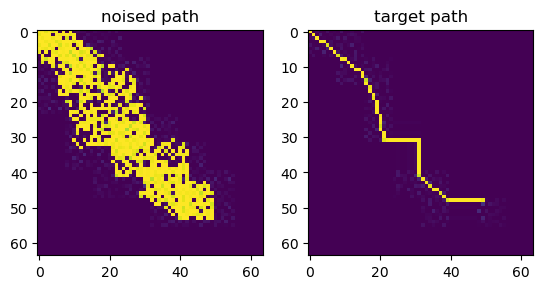

In [5]:
ds.show(28)

In [7]:
denoise_model = tf.keras.Sequential([
    #encoder
    tf.keras.layers.Conv2D(32,3,
                           activation="relu",
                           padding="same",
                           input_shape=(64, 64,1)),
    tf.keras.layers.MaxPooling2D(2,padding="same"),
    tf.keras.layers.Conv2D(16,3,activation="relu",padding="same"),
    tf.keras.layers.MaxPooling2D(2,padding="same"),
    #decoder
    tf.keras.layers.Conv2D(16,3,activation="relu",padding="same"),
    tf.keras.layers.UpSampling2D(2),
    tf.keras.layers.Conv2D(32,3,activation="relu",padding="same"),
    tf.keras.layers.UpSampling2D(2),
    #output
    tf.keras.layers.Conv2D(1,3,activation="sigmoid",padding="same")
])

denoise_model.compile(optimizer="adam",loss="binary_crossentropy")
denoise_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 32, 32, 16)       

In [8]:
denoise_model.fit(x_train, y_train, epochs=120, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/120
125/125 [==============================] - 35s 269ms/step - loss: 0.1549 - val_loss: 0.0599
Epoch 2/120
125/125 [==============================] - 34s 273ms/step - loss: 0.0571 - val_loss: 0.0539
Epoch 3/120
125/125 [==============================] - 34s 271ms/step - loss: 0.0522 - val_loss: 0.0505
Epoch 4/120
125/125 [==============================] - 34s 272ms/step - loss: 0.0495 - val_loss: 0.0485
Epoch 5/120
125/125 [==============================] - 35s 278ms/step - loss: 0.0479 - val_loss: 0.0473
Epoch 6/120
125/125 [==============================] - 35s 278ms/step - loss: 0.0468 - val_loss: 0.0463
Epoch 7/120
125/125 [==============================] - 35s 276ms/step - loss: 0.0460 - val_loss: 0.0456
Epoch 8/120
125/125 [==============================] - 35s 276ms/step - loss: 0.0454 - val_loss: 0.0451
Epoch 9/120
125/125 [==============================] - 37s 293ms/step - loss: 0.0449 - val_loss: 0.0447
Epoch 10/120
125/125 [==============================] - 35s 276m

In [9]:
pred = denoise_model.predict(x_test)

63/63 [==============================] - 2s 33ms/step


In [1]:
from random import randint
index = randint(0,1999)
fig, axis = plt.subplots(1, 3)

axis[0].imshow(x_test[index])
axis[1].imshow(pred[index])
axis[2].imshow(y_test[index])
plt.gray()

NameError: name 'plt' is not defined

In [17]:
denoise_model.save("pretrained_models/denoise_model_002")

INFO:tensorflow:Assets written to: pretrained_models/denoise_model_002/assets


INFO:tensorflow:Assets written to: pretrained_models/denoise_model_002/assets
